In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
% cd /Users/MiroWang/Desktop/Github Repo/CreditFraudData

/Users/MiroWang/Desktop/Github Repo/CreditFraudData


In [25]:
train_frame = pd.read_csv("train_frame_creditcard.csv", index_col = 0)

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit
X_rf = train_frame[train_frame.columns[:-1]].as_matrix()
y_rf = train_frame['Class']

strsplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=36)
for train_index, test_index in strsplit.split(X_rf, y_rf):
    X_train_rf, X_test_rf = X_rf[train_index], X_rf[test_index]
    y_train_rf, y_test_rf = y_rf[train_index], y_rf[test_index]
    
print(X_train_rf.shape, X_test_rf.shape, y_train_rf.shape, y_test_rf.shape)

(205060, 29) (51266, 29) (205060,) (51266,)


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfclf = RandomForestClassifier(class_weight = {0: 1, 1: 9})
parameters = {'max_depth':[2, 5], 'n_estimators':[150, 180, 200]}
rf = GridSearchCV(rfclf, parameters)


In [30]:
import timeit
start = timeit.default_timer()
rf.fit(X_train_rf, y_train_rf)
stop = timeit.default_timer()
print("Fitting Time: %s seconds" % (stop - start))

Fitting Time: 727.9189740290167 seconds


In [31]:
y_score = rf.predict_proba(X_test_rf)

array([0.00233213, 0.00254527, 0.00242925, ..., 0.00258419, 0.00235098,
       0.01545054])

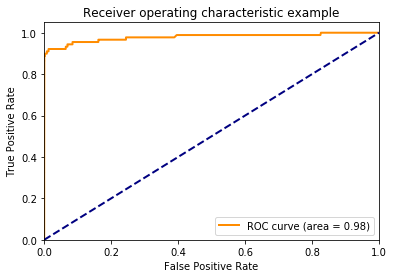

In [39]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, confusion_matrix, precision_score, recall_score

fpr_rf, tpr_rf, threshold = roc_curve(y_test_rf, y_score[:,1])

def plot_roc(fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc(fpr_rf, tpr_rf)

In [79]:
rf_cm = confusion_matrix(y_test_rf, rf.predict(X_test_rf))
print ("cost of random forest classifier %s" % (rf_cm[0][1]*1 + rf_cm[1][0]*1000))

cost of random forest classifier 18010


In [34]:
rf_cm

array([[51167,    10],
       [   18,    71]])

In [35]:
importances = rf.best_estimator_.feature_importances_
indices = np.argsort(importances)

In [60]:
def plot_import():
    plt.figure()
    plt.title("Feature importances")
    plt.barh(range(X_train_rf.shape[1]), importances[indices],color="orange",align="center", 
        tick_label = train_frame.columns[:-1][indices])
    plt.show()

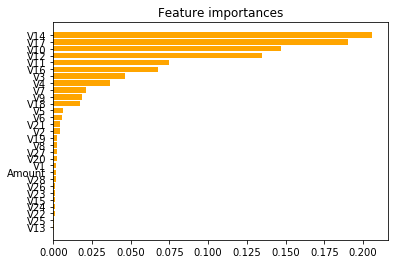

In [61]:
plot_import()

## Try use only important features and see if it will improve prediction results

In [63]:
drop_columns = train_frame.columns[:-1][indices][:6]
print (drop_columns)

Index(['V13', 'V25', 'V22', 'V24', 'V15', 'V23'], dtype='object')


In [66]:
new_train = train_frame.drop(drop_columns, axis = 1)

In [67]:
X_rf2 = new_train[new_train.columns[:-1]].as_matrix()
y_rf2 = new_train['Class']

strsplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=36)
for train_index, test_index in strsplit.split(X_rf2, y_rf2):
    X_train_rf2, X_test_rf2 = X_rf2[train_index], X_rf2[test_index]
    y_train_rf2, y_test_rf2 = y_rf2[train_index], y_rf2[test_index]
    
print(X_train_rf2.shape, X_test_rf2.shape, y_train_rf2.shape, y_test_rf2.shape)

(205060, 23) (51266, 23) (205060,) (51266,)


In [69]:
rfclf2 = RandomForestClassifier(class_weight = {0: 1, 1: 9})
rf2 = GridSearchCV(rfclf2, parameters)


In [71]:
start = timeit.default_timer()
rf2.fit(X_train_rf2, y_train_rf2)
stop = timeit.default_timer()
print("Fitting Time: %s seconds" % (stop - start))

Fitting Time: 608.1004449810134 seconds


In [72]:
y_score2 = rf2.predict_proba(X_test_rf2)

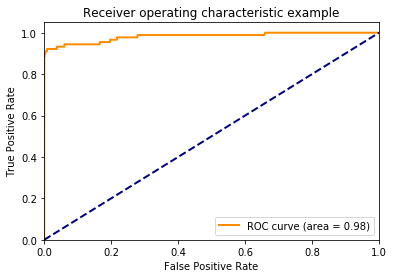

In [73]:
fpr_rf2, tpr_rf2, threshold2 = roc_curve(y_test_rf2, y_score2[:,1])
plot_roc(fpr_rf2, tpr_rf2)

In [77]:
rf_cm2 = confusion_matrix(y_test_rf2, rf2.predict(X_test_rf2))
print ("cost of random forest classifier %s" % (rf_cm2[0][1]*1 + rf_cm2[1][0]*1000))

cost of random forest classifier 18011


In [78]:
print(rf_cm2)

[[51166    11]
 [   18    71]]


In [80]:
print(rf2.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 9},
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=180, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
